# Visualization of conditional Probabilities of Solar Energetic Particles given Halo Coronal Mass Ejection in a spatial grid of 12 * 10.
##Authors : Akhil Arya, Georgia State University

# 1. Abstarct
We present a python based software module which will visualize the grid based on the longitude and latitude coordinates of active regions. Firstly, we partitioned our coordinates space into multiple bins. The idea is to create a spatial grids using the bins created from spatial coordinates. Each element of the spatial grid will represent the probability of presence of SEP event given a Halo CME is already present in that set of latitude and longitude. 

# Loading Packages

In [1]:
import pandas as pd
import numpy as np
import math 
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Loading the active region data 

In [2]:
ar_df=pd.read_csv("noaa_ar_1996_2019.csv")

Selecting the required columns : timestamp, active region, longitude and latutude from the above data. Longitude Values will range in [-180,180] ; -ve represent east direction while +ve values denotes west direction. Latitude values will range in [-90,90] ; +ve value denotes North direction while -ve direction denotes south direction

In [3]:
df=ar_df[["ar_time","noaa_ar_no","central_meridian_dist","latitude"]]
df["ar_time"]=pd.to_datetime(df["ar_time"]).dt.date
df

,ar_time,noaa_ar_no,central_meridian_dist,latitude
0,1996-01-02,7933,76,-12
1,1996-01-02,7934,53,-4
2,1996-01-02,7935,6,11
3,1996-01-02,7937,-49,-9
4,1996-01-03,7933,89,-12
...,...,...,...,...
45186,2018-12-21,12731,35,13
45187,2018-12-22,12731,49,13
45188,2018-12-23,12731,63,13
45189,2018-12-24,12731,77,13


For longitude values, some values were observed out of the range of [-180,180], Hence this code will convert those value by doing mathematical operation to their respective correct values . For example -186 longitude value will be converted to 174

In [4]:
df["central_meridian_dist"]=np.where(df["central_meridian_dist"]>180,
                                     df["central_meridian_dist"]-360,df["central_meridian_dist"] )
df["central_meridian_dist"]=np.where(df["central_meridian_dist"]<-180,
                                     df["central_meridian_dist"]+360,df["central_meridian_dist"] )


This part will cut our longitude and latitude into bins. It will assign the bin to every value of coordinates, based on the bin it will fall. 
Longitude Bins:
1. [-180,90)- Bins for back side of sun for east direction coordinates

2. [90,180)-Bins for back side of sun on west direction coordinates

3. 10 other equal bins are created between [-90,90- for front side


Latitude bins:
10 equal bins are created between [-90,90]


In [5]:
bins_long = [-180,-90,-72,-54,-36,-18,0,18,36,54,72,90,180]
bins_lat=[-90,-72,-54,-36,-18,0,18,36,54,72,90]
df['AR_Lat_bin_names'] = pd.cut(df['latitude'], bins_lat,include_lowest=True)
df['AR_Long_bin_names'] = pd.cut(df['central_meridian_dist'], bins_long,include_lowest=True)


# Loading SEP Data

In [6]:
sep_df=pd.read_csv('The_GSEP_list.csv')
sep_df["fl_lon"]=pd.to_numeric(sep_df["fl_lon"], errors='coerce')
sep_df["fl_lat"]=pd.to_numeric(sep_df["fl_lat"], errors='coerce')


Selecting required features from SEP data

In [7]:
sep_filtered=sep_df[["sep_index","timestamp","cdaw_sep_id","cme_id","noaa_ar","fl_lon","fl_lat","gsep_pf_gt10MeV"]]
sep_filtered["timestamp"]= pd.to_datetime(sep_filtered["timestamp"])
sep_filtered["timestamp"]=sep_filtered["timestamp"].dt.date


In [8]:
def bin_formation(x):
    if x <10:
        return '<10'
    elif (x>=10) and (x<100):
        return '≥10 to <100'
    elif (x>=100) and (x<1000):
        return '≥100 to <1000'
    elif (x>1000) and (x<10000):
        return '≥1000 to <10000'
    else:
        return '≥10000'
sep_filtered["gsep_pf_gt10_bins"]=sep_filtered['gsep_pf_gt10MeV'].apply(bin_formation)   

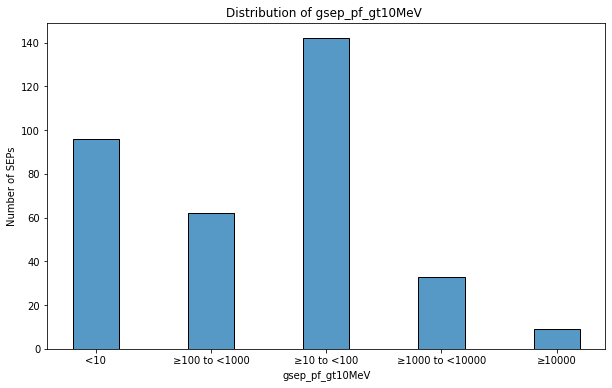

In [9]:
fig, x = plt.subplots(figsize=(10,6))
ax=sns.histplot(data=sep_filtered, x="gsep_pf_gt10_bins",shrink =0.4,ax=x).set(title='Distribution of gsep_pf_gt10MeV ',
                                                                               xlabel='gsep_pf_gt10MeV', 
                                                                               ylabel='Number of SEPs')


In this phase, we have merged the active regions data frame with thier bins value to the SEP information. SEP data frame & Active regions  dataframe are joined on active regions & timestamp. Our output table is shown below, which has SEP information and thier respective active region bins

In [10]:
new_df = pd.merge(sep_filtered, df,  how='inner', left_on=['noaa_ar','timestamp'], 
                  right_on = ['noaa_ar_no','ar_time'])
new_df

,sep_index,timestamp,cdaw_sep_id,cme_id,noaa_ar,fl_lon,fl_lat,gsep_pf_gt10MeV,gsep_pf_gt10_bins,ar_time,noaa_ar_no,central_meridian_dist,latitude,AR_Lat_bin_names,AR_Long_bin_names
0,gsep_136,1997-11-04,cdaw_sep_001,lasco_509,8100.0,33.0,-14.0,67.100,≥10 to <100,1997-11-04,8100,27,-20,"(-36.0, -18.0]","(18.0, 36.0]"
1,gsep_137,1997-11-06,cdaw_sep_002,lasco_521,8100.0,63.0,-18.0,532.000,≥100 to <1000,1997-11-06,8100,53,-20,"(-36.0, -18.0]","(36.0, 54.0]"
2,gsep_138,1998-04-20,cdaw_sep_003,lasco_878,8202.0,119.0,-17.0,1610.000,≥1000 to <10000,1998-04-20,8202,73,-24,"(-36.0, -18.0]","(72.0, 90.0]"
3,gsep_139,1998-04-29,NaN,lasco_901,8210.0,-20.0,-18.0,2.510,<10,1998-04-29,8210,-30,-17,"(-18.0, 0.0]","(-36.0, -18.0]"
4,gsep_140,1998-05-02,cdaw_sep_004,lasco_910,8210.0,15.0,-15.0,149.000,≥100 to <1000,1998-05-02,8210,10,-17,"(-18.0, 0.0]","(0.0, 18.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,gsep_338,2016-01-02,cdaw_sep_148,lasco_26928,12473.0,82.0,-25.0,21.522,≥10 to <100,2016-01-02,12473,73,-21,"(-36.0, -18.0]","(72.0, 90.0]"
156,gsep_339,2017-07-14,cdaw_sep_149,lasco_28753,12665.0,29.0,-6.0,22.374,≥10 to <100,2017-07-14,12665,30,-7,"(-18.0, 0.0]","(18.0, 36.0]"
157,gsep_340,2017-09-04,cdaw_sep_150,lasco_28869,12673.0,12.0,-10.0,210.190,≥100 to <1000,2017-09-04,12673,2,-10,"(-18.0, 0.0]","(0.0, 18.0]"
158,gsep_341,2017-09-06,cdaw_sep_151,lasco_28874,12673.0,33.0,-8.0,849.190,≥100 to <1000,2017-09-06,12673,30,-9,"(-18.0, 0.0]","(18.0, 36.0]"


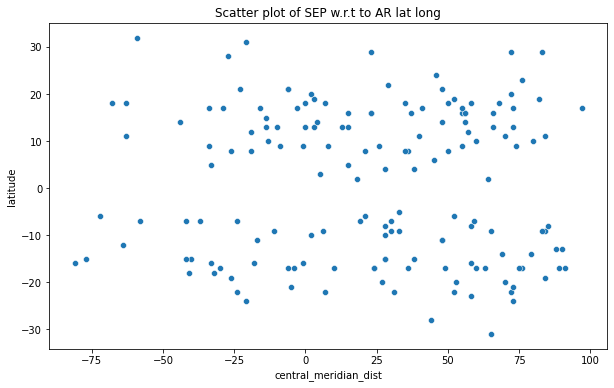

In [11]:
fig, x = plt.subplots(figsize=(10,6))
ax=sns.scatterplot(data=new_df, x="central_meridian_dist", y="latitude",ax=x).set(title=
                                                                               'Scatter plot of SEP w.r.t to AR lat long')

This code will aggregate our data based on the Latitude & Longitude bins. We will count the number of SEP's for each pair of lat & long bins using group by operation on the above dataframe. Our output dataframe is shown below:

In [12]:
groups = new_df.groupby(["AR_Lat_bin_names", "AR_Long_bin_names"])
SEP_bin_df=pd.DataFrame()
SEP_bin_df['SEP_Count']=groups['sep_index'].count()

SEP_bin_df=SEP_bin_df.reset_index()
SEP_bin_df

,AR_Lat_bin_names,AR_Long_bin_names,SEP_Count
0,"(-90.001, -72.0]","(-180.001, -90.0]",0
1,"(-90.001, -72.0]","(-90.0, -72.0]",0
2,"(-90.001, -72.0]","(-72.0, -54.0]",0
3,"(-90.001, -72.0]","(-54.0, -36.0]",0
4,"(-90.001, -72.0]","(-36.0, -18.0]",0
...,...,...,...
115,"(72.0, 90.0]","(18.0, 36.0]",0
116,"(72.0, 90.0]","(36.0, 54.0]",0
117,"(72.0, 90.0]","(54.0, 72.0]",0
118,"(72.0, 90.0]","(72.0, 90.0]",0


# Extracting data for Halo CMEs

In the code below, it will scrape the data from the this URL : https://cdaw.gsfc.nasa.gov/CME_list/halo/halo.html. Some data cleaning steps are performed in order to get relevant and cleaned data


In [ ]:
table_MN = pd.read_html('https://cdaw.gsfc.nasa.gov/CME_list/halo/halo.html')
patternDel = "Backside*|.*b|--.*"
filter = table_MN[1]['Source Location'].str.contains(patternDel)
Halo_df=table_MN[1][~filter]

In [82]:
df_split1=Halo_df['Source Location'].str.split('[NSEW?]|>', expand=True)
df_split1.columns = ['g1', "Lat","Long",'g2']
df_split2=Halo_df['Source Location'].str.split('\d+', expand=True)
df_split2.columns = ["Lat_direction", "Long_direction","g3"]


In [83]:
cordinates_df=pd.concat([df_split1,df_split2],axis=1)
cordinates_df["Lat"]=pd.to_numeric(cordinates_df["Lat"])
cordinates_df["Long"]=pd.to_numeric(cordinates_df["Long"])
cordinates_df["Lat"]=np.where(cordinates_df['Lat_direction'] == 'S',
                                           cordinates_df['Lat'] * -1,
                                           cordinates_df['Lat'])
cordinates_df["Long"]=np.where(cordinates_df['Long_direction'] == 'E',
                                           cordinates_df['Long'] * -1,
                                           cordinates_df['Long'])


Final cleaned data for Halo CMEs is stored in HCME_df

In [84]:
HCME_df=pd.concat([Halo_df,cordinates_df[['Lat',"Long"]]],axis=1)


For longitude values, some values were observed out of the range of [-180,180], Hence this code will convert those value by doing mathematical operation to their respective correct values . For example -186 longitude value will be converted to 174

In [85]:
HCME_df["Long"]=np.where(HCME_df["Long"]<-180,HCME_df["Long"]+360,HCME_df["Long"] )
HCME_df["Long"]=np.where(HCME_df["Long"]>180,HCME_df["Long"]-360,HCME_df["Long"] )

This part will cut our longitude and latitude into bins. It will assign the bin to every value of coordinates, based on the bin it will fall. 
Longitude Bins:
1. [-180,90)- Bins for back side of sun for east direction coordinates

2. [90,180)-Bins for back side of sun on west direction coordinates

3. 10 other equal bins are created between [-90,90- for front side


Latitude bins:
10 equal bins are created between [-90,90]


In [86]:
HCME_df['HCME_Lat_bin_names'] = pd.cut(HCME_df['Lat'], bins_lat,include_lowest=True)
HCME_df['HCME_Long_bin_names'] = pd.cut(HCME_df['Long'], bins_long,include_lowest=True)
HCME_df=HCME_df.reset_index()

Grouping By the bins and counting the number of Halo CME for each pair of bins

In [87]:
groups_cme = HCME_df.groupby(["HCME_Lat_bin_names", "HCME_Long_bin_names"])
HCME_bin_df=pd.DataFrame()
HCME_bin_df['HCME_Count']=groups_cme['index'].count()

HCME_bin_df=HCME_bin_df.reset_index()
HCME_bin_df

,HCME_Lat_bin_names,HCME_Long_bin_names,HCME_Count
0,"(-90.001, -72.0]","(-180.001, -90.0]",0
1,"(-90.001, -72.0]","(-90.0, -72.0]",0
2,"(-90.001, -72.0]","(-72.0, -54.0]",0
3,"(-90.001, -72.0]","(-54.0, -36.0]",0
4,"(-90.001, -72.0]","(-36.0, -18.0]",0
...,...,...,...
115,"(72.0, 90.0]","(18.0, 36.0]",0
116,"(72.0, 90.0]","(36.0, 54.0]",0
117,"(72.0, 90.0]","(54.0, 72.0]",0
118,"(72.0, 90.0]","(72.0, 90.0]",0


Joining Aggregated SEP dataframe with Halo CME dataframe on BINS

In [88]:
cond_prob_df=SEP_bin_df.merge(HCME_bin_df,how='inner',
                              left_on=['AR_Lat_bin_names','AR_Long_bin_names'], right_on = ['HCME_Lat_bin_names','HCME_Long_bin_names'])

In [89]:
cond_prob_df

,AR_Lat_bin_names,AR_Long_bin_names,SEP_Count,HCME_Lat_bin_names,HCME_Long_bin_names,HCME_Count
0,"(-90.001, -72.0]","(-180.001, -90.0]",0,"(-90.001, -72.0]","(-180.001, -90.0]",0
1,"(-90.001, -72.0]","(-90.0, -72.0]",0,"(-90.001, -72.0]","(-90.0, -72.0]",0
2,"(-90.001, -72.0]","(-72.0, -54.0]",0,"(-90.001, -72.0]","(-72.0, -54.0]",0
3,"(-90.001, -72.0]","(-54.0, -36.0]",0,"(-90.001, -72.0]","(-54.0, -36.0]",0
4,"(-90.001, -72.0]","(-36.0, -18.0]",0,"(-90.001, -72.0]","(-36.0, -18.0]",0
...,...,...,...,...,...,...
115,"(72.0, 90.0]","(18.0, 36.0]",0,"(72.0, 90.0]","(18.0, 36.0]",0
116,"(72.0, 90.0]","(36.0, 54.0]",0,"(72.0, 90.0]","(36.0, 54.0]",0
117,"(72.0, 90.0]","(54.0, 72.0]",0,"(72.0, 90.0]","(54.0, 72.0]",0
118,"(72.0, 90.0]","(72.0, 90.0]",0,"(72.0, 90.0]","(72.0, 90.0]",0


Since, for each possible pairs of bins, we have count of SEP & Halo CME available in the merged table above, we can use these counts to calculate the probabilities. The column  "Prob_SEP_given_Hcme" in the data frame below will store the conditional probabilities


# Laplacian Smoothing

Laplacian smoothing is used to smooth the zero probabilities. Laplacian smoothing will essentially take higher probabilities and distribute among the zero probabilities. Hence, after applying smoothing we don't have any zero probabilities

Laplacian smoothing P(A|B)=(count(A) +K)/count(B)+K*Domain{X} ; where K is a constant ; we have choosen K=3 and Domain{X} = 120, since we have 120 total data points available : We should change the value of Domain when we change the shape of required grids

In [19]:
cond_prob_df["Prob_SEP_given_Hcme"]=cond_prob_df["SEP_Count"]/cond_prob_df["HCME_Count"]
cond_prob_df["Laplacian_smoothing"]=(cond_prob_df["SEP_Count"] +3)/ (cond_prob_df["HCME_Count"] + (3*120))
cond_prob_df

,AR_Lat_bin_names,AR_Long_bin_names,SEP_Count,HCME_Lat_bin_names,HCME_Long_bin_names,HCME_Count,Prob_SEP_given_Hcme,Laplacian_smoothing
0,"(-90.001, -72.0]","(-180.001, -90.0]",0,"(-90.001, -72.0]","(-180.001, -90.0]",0,NaN,0.008333
1,"(-90.001, -72.0]","(-90.0, -72.0]",0,"(-90.001, -72.0]","(-90.0, -72.0]",0,NaN,0.008333
2,"(-90.001, -72.0]","(-72.0, -54.0]",0,"(-90.001, -72.0]","(-72.0, -54.0]",0,NaN,0.008333
3,"(-90.001, -72.0]","(-54.0, -36.0]",0,"(-90.001, -72.0]","(-54.0, -36.0]",0,NaN,0.008333
4,"(-90.001, -72.0]","(-36.0, -18.0]",0,"(-90.001, -72.0]","(-36.0, -18.0]",0,NaN,0.008333
...,...,...,...,...,...,...,...,...
115,"(72.0, 90.0]","(18.0, 36.0]",0,"(72.0, 90.0]","(18.0, 36.0]",0,NaN,0.008333
116,"(72.0, 90.0]","(36.0, 54.0]",0,"(72.0, 90.0]","(36.0, 54.0]",0,NaN,0.008333
117,"(72.0, 90.0]","(54.0, 72.0]",0,"(72.0, 90.0]","(54.0, 72.0]",0,NaN,0.008333
118,"(72.0, 90.0]","(72.0, 90.0]",0,"(72.0, 90.0]","(72.0, 90.0]",0,NaN,0.008333


Pivoting the above dataframe for visualization

In [20]:
piv = pd.pivot_table(cond_prob_df, values="Laplacian_smoothing",index=["AR_Lat_bin_names"], columns=["AR_Long_bin_names"], fill_value=0)
piv

AR_Long_bin_names,"(-180.001, -90.0]","(-90.0, -72.0]","(-72.0, -54.0]","(-54.0, -36.0]","(-36.0, -18.0]","(-18.0, 0.0]","(0.0, 18.0]","(18.0, 36.0]","(36.0, 54.0]","(54.0, 72.0]","(72.0, 90.0]","(90.0, 180.0]"
AR_Lat_bin_names,,,,,,,,,,,,
"(-90.001, -72.0]",0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
"(-72.0, -54.0]",0.008333,0.008333,0.008333,0.008333,0.008310,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
"(-54.0, -36.0]",0.008333,0.008333,0.008333,0.008333,0.008333,0.008287,0.008310,0.008310,0.008333,0.008333,0.008333,0.008287
"(-36.0, -18.0]",0.007958,0.008310,0.008242,0.010989,0.018919,0.010753,0.010782,0.013661,0.016438,0.022099,0.016438,0.008021
"(-18.0, 0.0]",0.007653,0.016349,0.013550,0.018868,0.018767,0.021053,0.015831,0.041995,0.021858,0.027100,0.032609,0.010499
"(0.0, 18.0]",0.007732,0.008130,0.016349,0.010811,0.029178,0.034121,0.033505,0.028571,0.029810,0.045946,0.021858,0.010230
"(18.0, 36.0]",0.008130,0.008310,0.010989,0.008264,0.016349,0.013477,0.013369,0.013661,0.016393,0.013736,0.016575,0.008287
"(36.0, 54.0]",0.008333,0.008310,0.008333,0.008333,0.008333,0.008333,0.008264,0.008333,0.008333,0.008333,0.008287,0.008333
"(54.0, 72.0]",0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


# Heat Map for the spatial grid

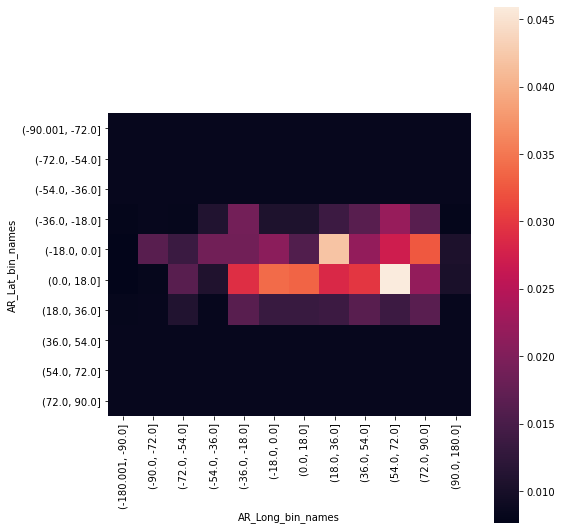

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot pivot table as heatmap using seaborn
fig, x = plt.subplots(figsize=(8,8))
pl = sns.heatmap(piv, square=True,ax=x)
plt.setp( pl.xaxis.get_majorticklabels(), rotation=90 )
plt.tight_layout()
plt.show()